In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### 0. First take a look at the basic statistical metrics - null, outlier

In [2]:
# Load the dataset
file_path = '/Users/kolwu/Downloads/UChi/Stats Model/Final Project/Football_teams_price_data.csv'
df = pd.read_csv(file_path)

In [3]:
df.head(10)

AveragePlayerAge  TotalGoalsLastSeason  MatchesWonLastSeason  \
0         24.367182                    28                    16   
1         34.162143                    89                    12   
2         30.443897                    43                     3   
3         28.177194                    84                    19   
4         20.652317                    36                    36   
5         20.651907                    56                    14   
6         18.987421                    69                    34   
7         32.724994                    64                    22   
8         28.218955                    39                    30   
9         30.037234                    78                    14   

   MatchesDrawnLastSeason  MatchesLostLastSeason  \
0                      36                     20   
1                      35                     31   
2                       9                     28   
3                      19                     34   
4                      10                      9   
5                      37                     28   
6                      20                     33   
7                      30                      8   
8                      12                     20   
9                      17                     18   

   TotalGoalsConcededLastSeason  TotalRevenueLastSeason  StadiumCapacity  \
0                            51              337.552001            55766   
1                            84              264.850402            15307   
2                            72              363.423205            77050   
3                            22              296.719959            61440   
4                            80              480.928532            78563   
5                            21              126.570639            66719   
6                            49              344.162281            50294   
7                            37              139.001745            42509   
8                            90               85.027421            96695   
9                            41               95.585934            94518   

   AverageAttendance  TransferSpendingLastSeason  ...  Country    Manager  \
0        5229.742720                  177.592126  ...  England  Manager B   
1       46172.738882                  125.441952  ...    Spain  Manager C   
2       78334.254989                   43.776137  ...    Spain  Manager C   
3       60080.423819                  183.936395  ...    Italy  Manager C   
4       10940.950513                   14.881518  ...   France  Manager D   
5       14053.340705                  176.145643  ...    Italy  Manager A   
6       83196.194545                   89.292513  ...    Spain  Manager B   
7       39296.663364                  138.008068  ...   France  Manager A   
8       80231.732805                   60.472617  ...    Italy  Manager A   
9       52330.956258                  173.546713  ...   France  Manager B   

   TeamFormation    PlayingStyle  HomeCity   StadiumType MainSponsor  \
0        4-2-3-1  Counter-Attack    City C  Multipurpose   Sponsor B   
1          3-4-3       Defensive    City C  Multipurpose   Sponsor A   
2          3-5-2       Attacking    City D       Classic   Sponsor A   
3          4-3-3  Counter-Attack    City C       Classic   Sponsor D   
4        4-2-3-1  Counter-Attack    City D    Historical   Sponsor C   
5          3-5-2      Possession    City E       Classic   Sponsor B   
6          4-3-3       Attacking    City C        Modern   Sponsor B   
7          4-4-2      Possession    City D        Modern   Sponsor D   
8          3-4-3      Possession    City A    Historical   Sponsor B   
9          4-4-2       Defensive    City E    Historical   Sponsor D   

  KitManufacturer OwnershipType          Price  
0  Manufacturer B       Private  4,375,181,628  
1  Manufacturer B    Consortium    859,750,388  
2  Manufacturer C    Consortium  2,168,913,729  
3  Manufacturer B 

Numeric Columns:

1.AveragePlayerAge: The average age of players in the team.

2.TotalGoalsLastSeason: Total goals scored by the team in the last season.

3.MatchesWonLastSeason: Number of matches won in the last season.

4.MatchesDrawnLastSeason: Number of matches drawn in the last season.

5.MatchesLostLastSeason: Number of matches lost in the last season.

6.TotalGoalsConcededLastSeason: Total goals conceded by the team in the last season.

7.TotalRevenueLastSeason: Total revenue generated by the team in the last season.

8.StadiumCapacity: Capacity of the team's stadium.

9.AverageAttendance: Average attendance at home matches.

10.TransferSpendingLastSeason: Amount spent on player transfers in the last season.

11.TransferIncomeLastSeason 

12.NumberOfTrophies   

13.MarketValueOfSquad  

14.AveragePlayerMarketValue  

15.YouthAcademyRating  



Categorical Columns:

16.League

17.Country: Country where the team is based.

18.Manager: Name of the team's manager.

19.TeamFormation: Formation typically used by the team (e.g., 4-2-3-1, 3-4-3).

20.PlayingStyle: Style of play (e.g., Counter-Attack, Defensive, Attacking).

21.HomeCity: City where the team is based.

22.StadiumType: Type of stadium (e.g., Multipurpose, Classic, Historical).

23.MainSponsor: Primary sponsor of the team.

24.KitManufacturer: Company manufacturing the team's kit.

25.OwnershipType: Type of ownership (e.g., Private, Consortium).



Target Column:

Price: The market price of the team in billions of dollars.

In [7]:
df.info()
#there is null since data from kaggle is generally cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AveragePlayerAge              50000 non-null  float64
 1   TotalGoalsLastSeason          50000 non-null  int64  
 2   MatchesWonLastSeason          50000 non-null  int64  
 3   MatchesDrawnLastSeason        50000 non-null  int64  
 4   MatchesLostLastSeason         50000 non-null  int64  
 5   TotalGoalsConcededLastSeason  50000 non-null  int64  
 6   TotalRevenueLastSeason        50000 non-null  float64
 7   StadiumCapacity               50000 non-null  int64  
 8   AverageAttendance             50000 non-null  float64
 9   TransferSpendingLastSeason    50000 non-null  float64
 10  TransferIncomeLastSeason      50000 non-null  float64
 11  NumberOfTrophies              50000 non-null  int64  
 12  MarketValueOfSquad            50000 non-null  float64
 13  A

In [92]:
df["Price"].describe()

count    5.000000e+04
mean     2.750726e+09
std      1.304135e+09
min      5.000337e+08
25%      1.621381e+09
50%      2.752562e+09
75%      3.886882e+09
max      4.999948e+09
Name: Price, dtype: float64

In [6]:
df.describe()

AveragePlayerAge  TotalGoalsLastSeason  MatchesWonLastSeason  \
count      50000.000000          50000.000000          50000.000000   
mean          26.480678             59.343160             18.425460   
std            4.902909             23.095732             10.955441   
min           18.000094             20.000000              0.000000   
25%           22.231468             39.000000              9.000000   
50%           26.481162             59.000000             18.000000   
75%           30.721124             79.000000             28.000000   
max           34.999527             99.000000             37.000000   

       MatchesDrawnLastSeason  MatchesLostLastSeason  \
count            50000.000000           50000.000000   
mean                18.604460              18.478100   
std                 10.980261              10.996911   
min                  0.000000               0.000000   
25%                  9.000000               9.000000   
50%                 19.000000              18.000000   
75%                 28.000000              28.000000   
max                 37.000000              37.000000   

       TotalGoalsConcededLastSeason  TotalRevenueLastSeason  StadiumCapacity  \
count                  50000.000000            50000.000000     50000.000000   
mean                      59.538680              274.506391     54854.567880   
std                       23.049783              130.150495     25986.349661   
min                       20.000000               50.004035     10013.000000   
25%                       40.000000              161.259631     32312.250000   
50%                       60.000000              274.402274     54814.000000   
75%                       79.000000              387.154302     77337.250000   
max                       99.000000              499.999691     99997.000000   

       AverageAttendance  TransferSpendingLastSeason  \
count       50000.000000                50000.000000   
mean        47425.311150                   99.845519   
std         24578.631962                   57.666798   
min          5003.395786                    0.006229   
25%         26181.373046                   50.196498   
50%         47449.443426                   99.927641   
75%         68720.697593                  149.525266   
max         89998.493713                  199.997388   

       TransferIncomeLastSeason  NumberOfTrophies  MarketValueOfSquad  \
count              50000.000000      50000.000000        50000.000000   
mean                 100.406919         24.584640          505.104996   
std                   57.609852         14.426361          286.475400   
min                    0.004302          0.000000           10.005993   
25%                   50.355226         12.000000          257.682086   
50%                  101.042932         25.000000          503.947159   
75%                  150.070587         37.000000          752.608455   
max                  199.999663         49.000000          999.968039   

       AveragePlayerMarketValue  YouthAcademyRating  
count              50000.000000        50000.000000  
mean                  25.249237           50.000278  
std                   14.298220           28.827688  
min                    0.500343            0.000318  
25%                   12.808254           25.102090  
50%                   25.293575           50.080630  
75%                   37.612826           74.788126  
max                   49.999690           99.997146

In [78]:
df.isnull().sum()

AveragePlayerAge                0
TotalGoalsLastSeason            0
MatchesWonLastSeason            0
MatchesDrawnLastSeason          0
MatchesLostLastSeason           0
TotalGoalsConcededLastSeason    0
TotalRevenueLastSeason          0
StadiumCapacity                 0
AverageAttendance               0
TransferSpendingLastSeason      0
TransferIncomeLastSeason        0
NumberOfTrophies                0
MarketValueOfSquad              0
AveragePlayerMarketValue        0
YouthAcademyRating              0
League                          0
Country                         0
Manager                         0
TeamFormation                   0
PlayingStyle                    0
HomeCity                        0
StadiumType                     0
MainSponsor                     0
KitManufacturer                 0
OwnershipType                   0
Price                           0
dtype: int64

#### 1. Numerical variable distribution

In [8]:
# Setting up the plot style
sns.set(style="whitegrid")

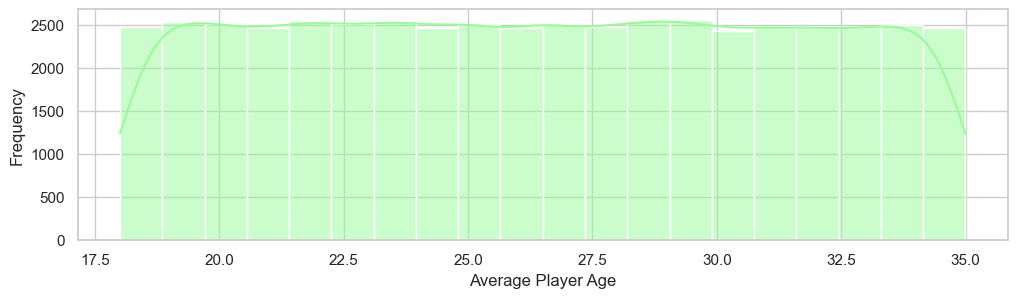

In [89]:
# Distribution of Average Player Age
plt.figure(figsize=(12, 3))
sns.histplot(df['AveragePlayerAge'], kde=True, bins=20, color='palegreen')
#plt.title('Distribution of Average Player Age')
plt.xlabel('Average Player Age')
plt.ylabel('Frequency')
plt.show()

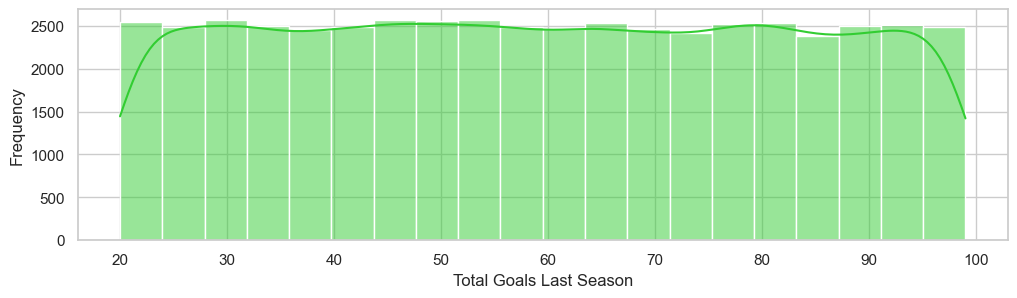

In [90]:
# Distribution of Total Goals Last Season
plt.figure(figsize=(12, 3))
sns.histplot(df['TotalGoalsLastSeason'], kde=True, bins=20, color='limegreen')
#plt.title('Distribution of Total Goals Last Season')
plt.xlabel('Total Goals Last Season')
plt.ylabel('Frequency')
plt.show()

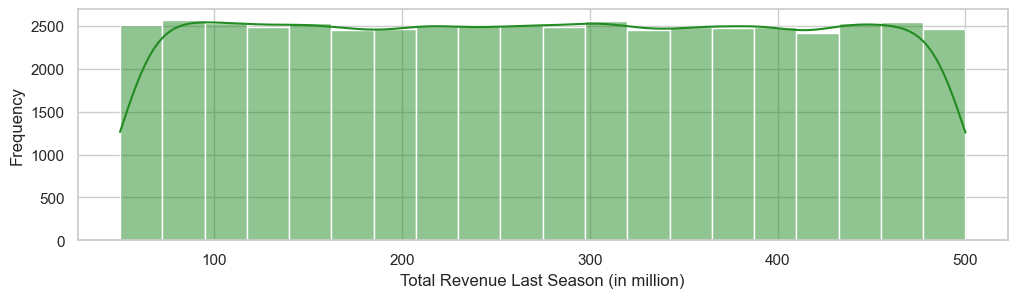

In [91]:
# Distribution of Total Revenue Last Season
plt.figure(figsize=(12, 3))
sns.histplot(df['TotalRevenueLastSeason'], kde=True, bins=20, color='forestgreen')
#plt.title('Distribution of Total Revenue Last Season')
plt.xlabel('Total Revenue Last Season (in million)')
plt.ylabel('Frequency')
plt.show()

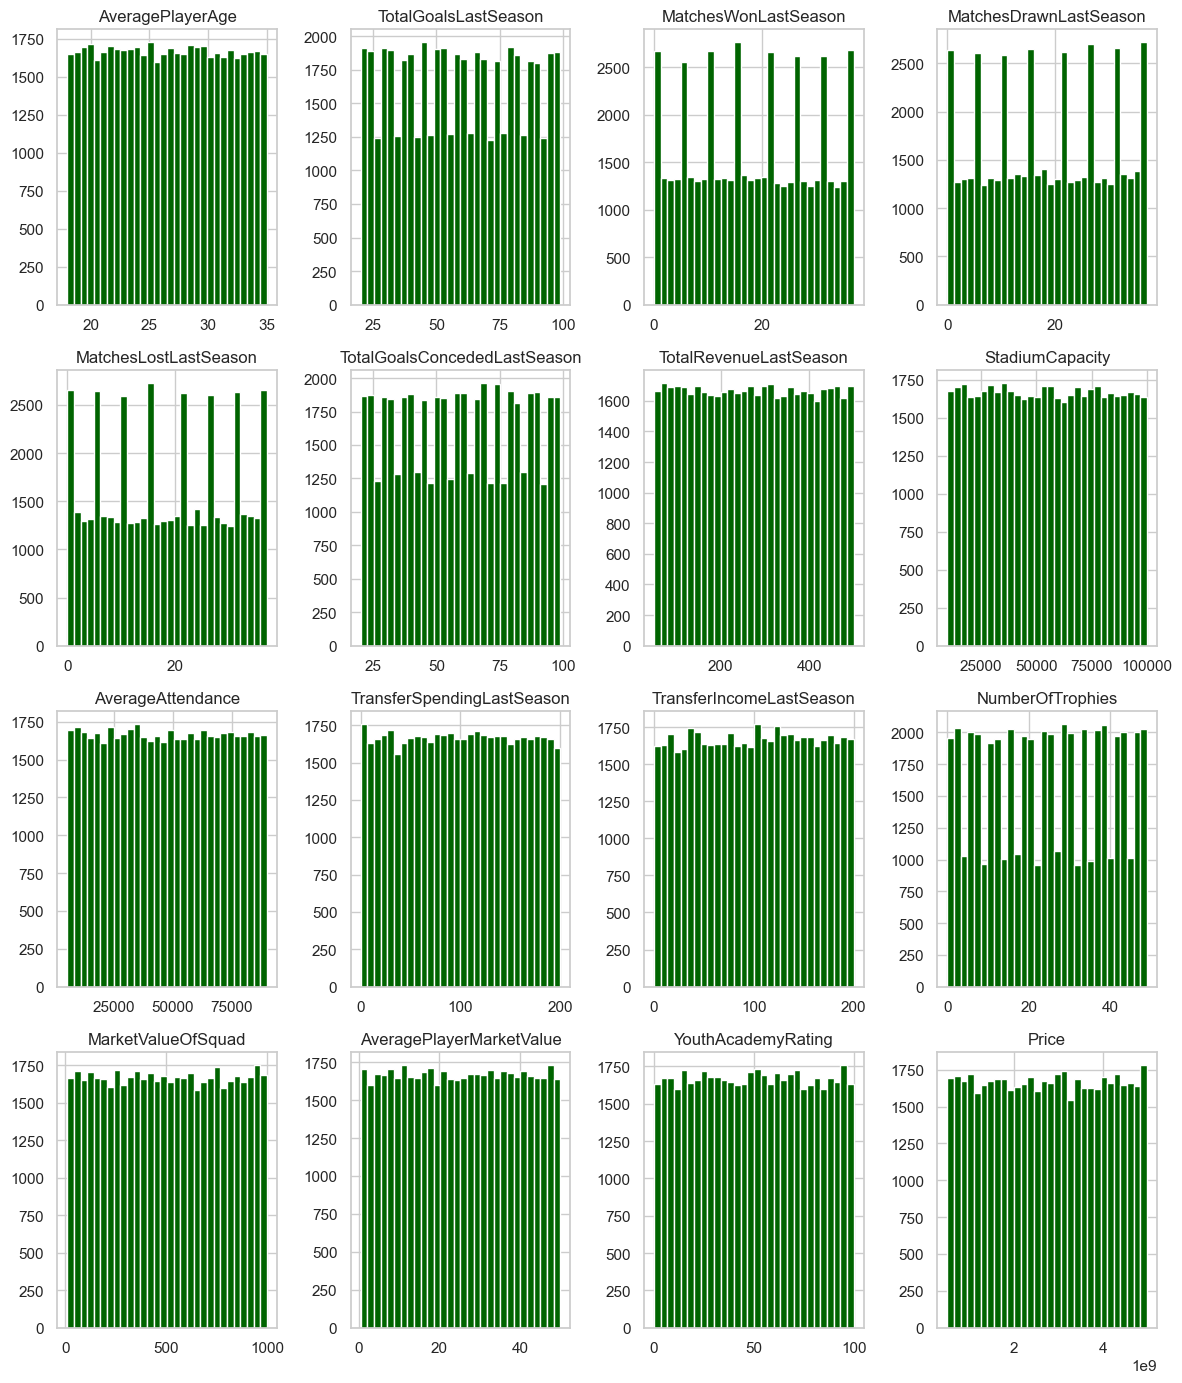

In [95]:
# Plot histograms for numerical columns
df.hist(figsize=(12, 14), bins=30, color='darkgreen')
plt.tight_layout()
plt.show()

#### 2. Categorical distribution - especially the correlation with the target-price

In [12]:
# Remove commas from the 'Price' column and convert it to a numeric type
df['Price'] = df['Price'].str.replace(',', '').astype(float)

/var/folders/nc/lsh1jsh56nl0hd5dtnq57gb80000gn/T/ipykernel_2304/1848317567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='League', y='Price', data=df, palette="Greens")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, y

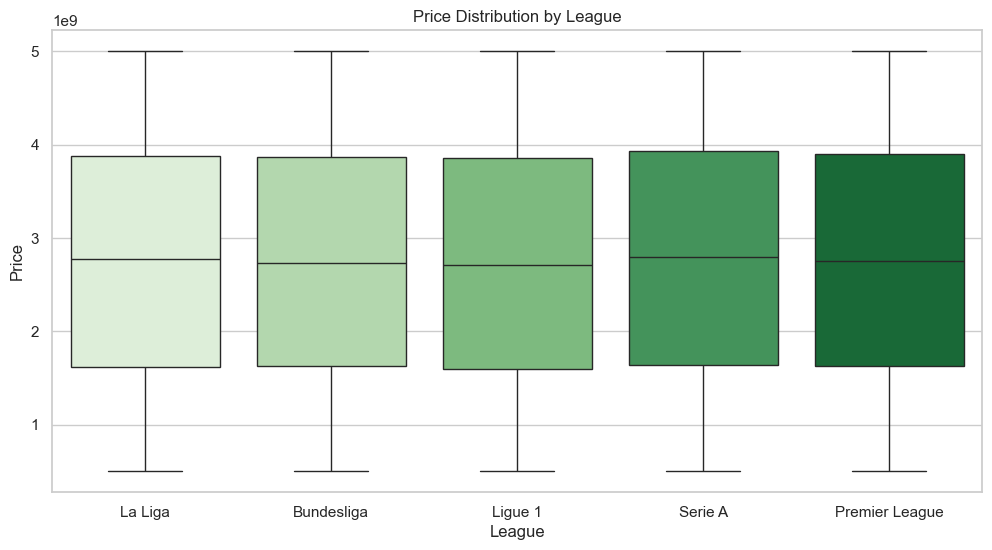

In [19]:
# Boxplot for League
plt.figure(figsize=(12, 6))
sns.boxplot(x='League', y='Price', data=df, palette="Greens")
plt.title('Price Distribution by League')
plt.xlabel('League')
plt.ylabel('Price')
plt.show()

/var/folders/nc/lsh1jsh56nl0hd5dtnq57gb80000gn/T/ipykernel_2304/1521685892.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Price', data=df, palette="Greens")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, 

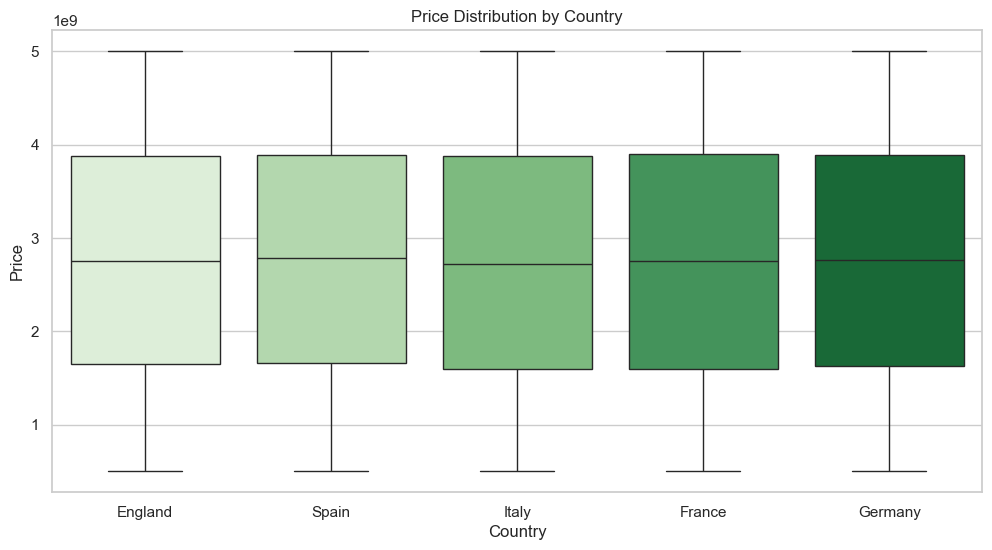

In [20]:
# Boxplot for Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Price', data=df, palette="Greens")
plt.title('Price Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Price')
plt.show()

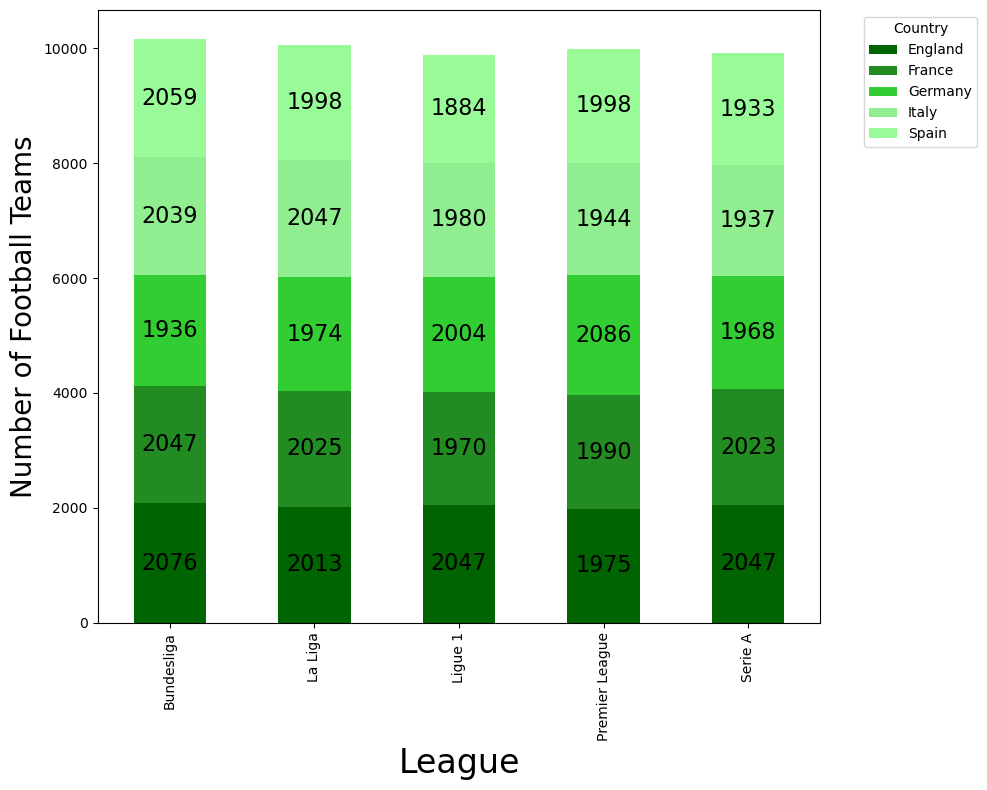

In [9]:
# distribution of league and country
country_by_league = df.groupby(['League', 'Country']).size().unstack(fill_value=0)

ax = country_by_league.plot(
    kind='bar', stacked=True, figsize=(10, 8),
    color=['darkgreen', 'forestgreen', 'limegreen', 'lightgreen', 'palegreen']
)

#plt.title('Country Distribution by League', fontsize=24, fontweight='bold')
plt.xlabel('League', fontsize=24)
plt.ylabel('Number of Football Teams', fontsize=20)
plt.legend(title='Country', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2  
    y = p.get_y() + height / 2  

    ax.text(x, y, int(height), ha='center', va='center', fontsize=16)

plt.tight_layout()
plt.show()

#### 3. Interaction effects - Examine the interaction effects between variables, such as studying the impact of different strategies

/var/folders/nc/lsh1jsh56nl0hd5dtnq57gb80000gn/T/ipykernel_2304/91985265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='PlayingStyle', y='Price', data=df, palette="Greens")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 lis

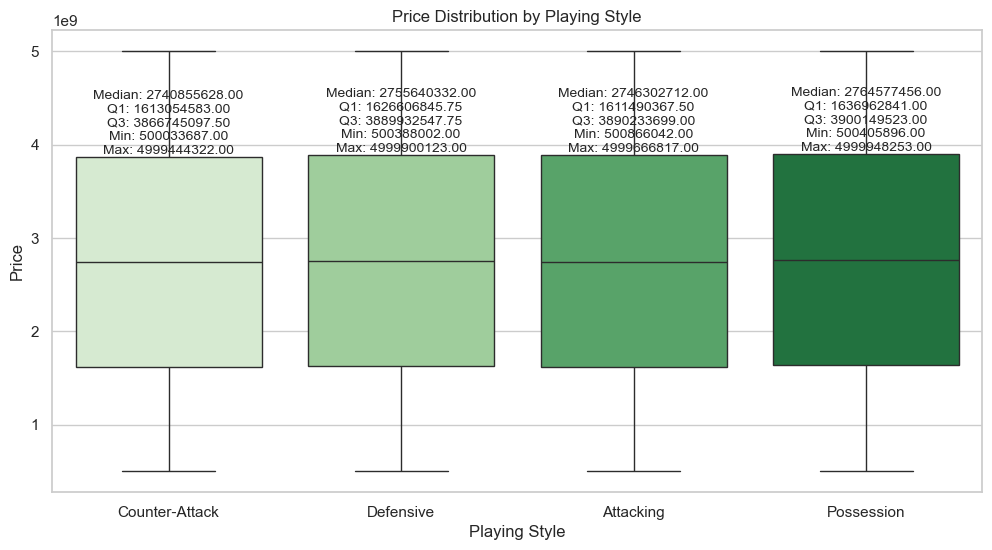

In [56]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='PlayingStyle', y='Price', data=df, palette="Greens")

for i in range(len(df['PlayingStyle'].unique())):
    price_data = df[df['PlayingStyle'] == df['PlayingStyle'].unique()[i]]['Price']
    
    median = price_data.median()
    q1 = price_data.quantile(0.25)
    q3 = price_data.quantile(0.75)
    min_val = price_data.min()
    max_val = price_data.max()
    
    x_pos = i
    y_pos = q3 + 0.05  
    
    ax.text(x_pos, y_pos, f'Median: {median:.2f}\nQ1: {q1:.2f}\nQ3: {q3:.2f}\nMin: {min_val:.2f}\nMax: {max_val:.2f}',
            horizontalalignment='center', verticalalignment='bottom', fontsize=10)

plt.title('Price Distribution by Playing Style')
plt.xlabel('Playing Style')
plt.ylabel('Price')
plt.show()

/var/folders/nc/lsh1jsh56nl0hd5dtnq57gb80000gn/T/ipykernel_2304/2021058089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='PlayingStyle', y='TotalGoalsLastSeason', data=df, palette="Greens")
/var/folders/nc/lsh1jsh56nl0hd5dtnq57gb80000gn/T/ipykernel_2304/2021058089.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='PlayingStyle', y='MatchesWonLastSeason', data=df, palette="Greens")
/var/folders/nc/lsh1jsh56nl0hd5dtnq57gb80000gn/T/ipykernel_2304/2021058089.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='PlayingSty

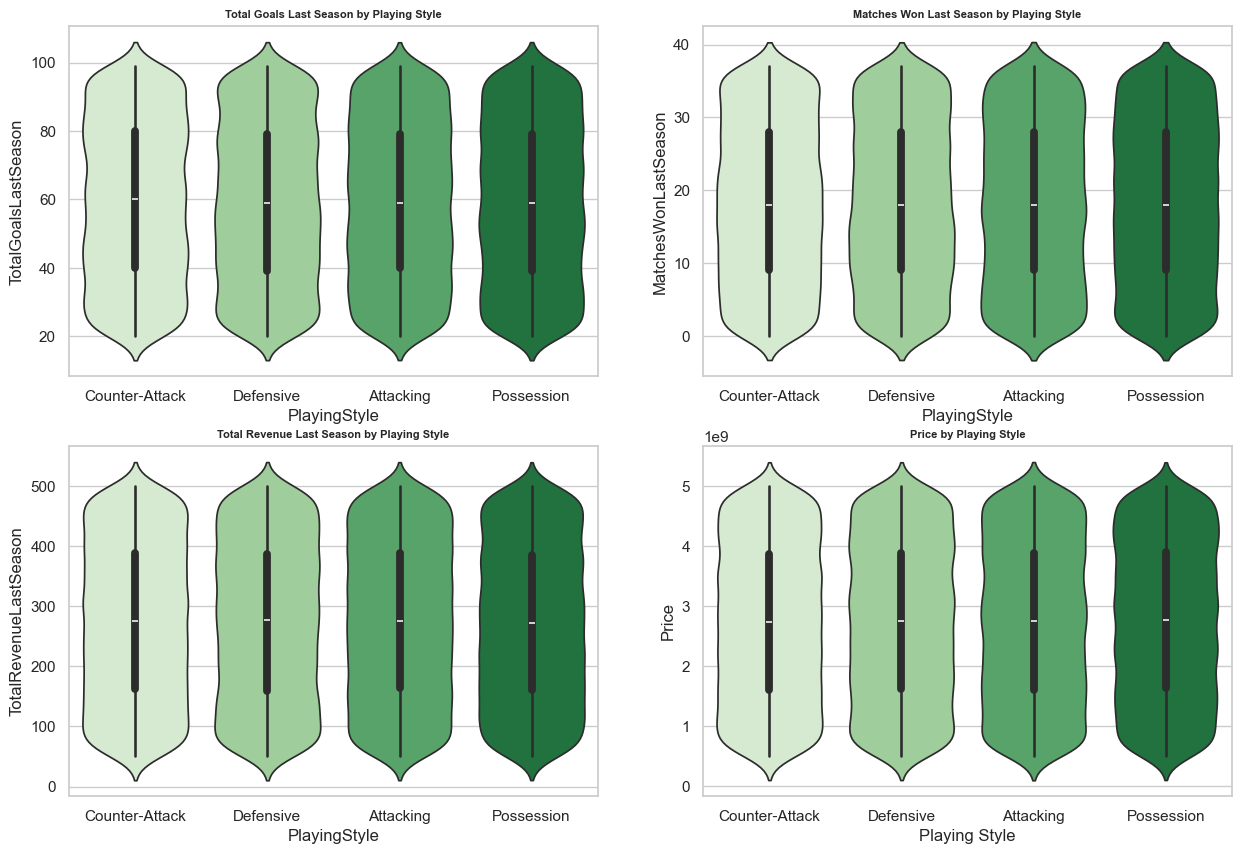

In [66]:
fig, ax = plt.subplots(figsize=(15, 10))


ax1=fig.add_subplot(2,2,1)
sns.violinplot(x='PlayingStyle', y='TotalGoalsLastSeason', data=df, palette="Greens")
ax1.set_title('Total Goals Last Season by Playing Style', fontsize=8, fontweight='bold')

ax2=fig.add_subplot(2,2,2)
sns.violinplot(x='PlayingStyle', y='MatchesWonLastSeason', data=df, palette="Greens")
ax2.set_title('Matches Won Last Season by Playing Style', fontsize=8, fontweight='bold')

ax3=fig.add_subplot(2,2,3)
sns.violinplot(x='PlayingStyle', y='TotalRevenueLastSeason', data=df, palette="Greens")
ax3.set_title('Total Revenue Last Season by Playing Style', fontsize=8, fontweight='bold')

ax4=fig.add_subplot(2,2,4)
sns.violinplot(x='PlayingStyle', y='Price', data=df, palette="Greens")
ax4.set_title('Price by Playing Style', fontsize=8, fontweight='bold')


plt.xlabel('Playing Style', fontsize=12)
ax.axis('off')
plt.show()

#### 4. Check the correlation between numerical variables using a heatmap

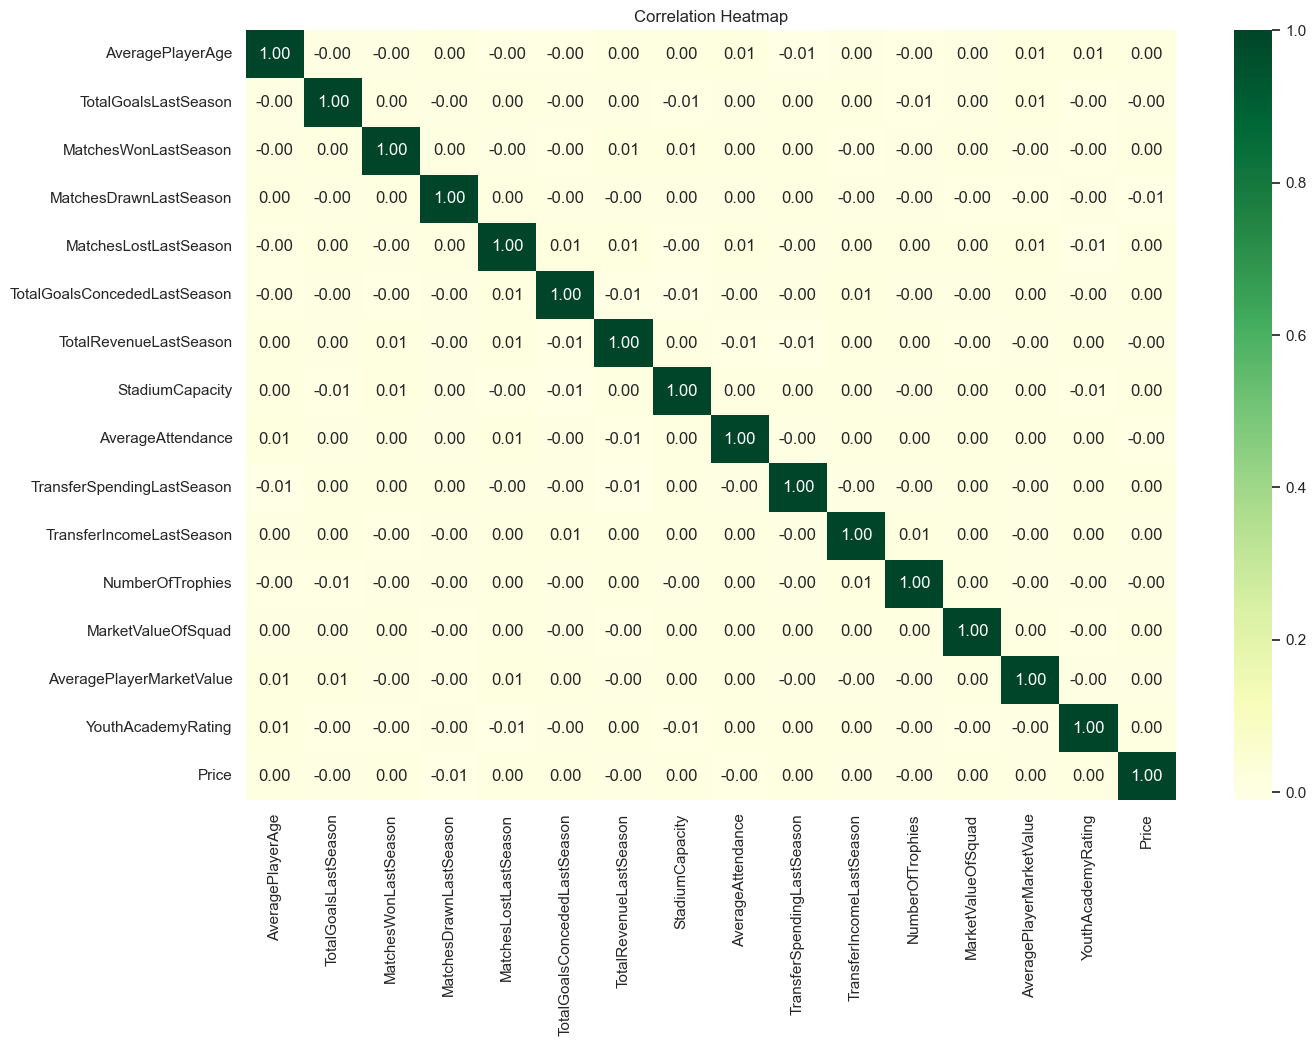

In [83]:
# Ensure df contains only numeric data by selecting numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Handle missing values, e.g., by dropping them or filling them
numeric_df = numeric_df.dropna()  # Dropping rows with NaN values

# Correlation heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()